## CLASSIFYING USING SESSION ACTION TYPE COUNTS
### Starting with logistic regression

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Import Data
airbnb_df  = pd.read_csv('input/train_users_2.csv',usecols=['id','country_destination'])
session_df = pd.read_csv('input/sessions.csv')

In [4]:
#Clean Data
session_df['secs_elapsed'].fillna(0,inplace=True)

In [5]:
session_df['action_type'].fillna('',inplace=True)
session_df['action_action_type'] = session_df['action']+'__'+session_df['action_type']

In [6]:
session_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,action_action_type
0,d1mm9tcy42,lookup,,NaN,Windows Desktop,319,lookup__
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753,search_results__click
2,d1mm9tcy42,lookup,,NaN,Windows Desktop,301,lookup__
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141,search_results__click
4,d1mm9tcy42,lookup,,NaN,Windows Desktop,435,lookup__
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703,search_results__click
6,d1mm9tcy42,lookup,,NaN,Windows Desktop,115,lookup__
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831,personalize__data
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842,index__view
9,d1mm9tcy42,lookup,,NaN,Windows Desktop,683,lookup__


In [7]:
session_users = session_df.groupby(['user_id','action_action_type']).count()['action_detail']


In [8]:
session_users

user_id     action_action_type                          
00023iyk9l  ajax_refresh_subtotal__click                     2
            callback__partner_callback                       1
            confirm_email__click                             1
            dashboard__view                                  4
            header_userpic__data                             2
            index__view                                      4
            pending__booking_request                         1
            personalize__data                                4
            requested__view                                  5
            search_results__click                            1
            show__                                           0
            show__view                                       6
            similar_listings__data                           3
            travel_plans_current__view                       2
0010k6l0om  ajax_refresh_subtotal__click                     

In [9]:
session_users = session_users.unstack()
session_users.fillna(0)


action_action_type,10__message_post,11__message_post,12__message_post,15__message_post,about_us__-unknown-,accept_decline__view,account__-unknown-,acculynk_bin_check_failed__-unknown-,acculynk_bin_check_success__-unknown-,acculynk_load_pin_pad__-unknown-,...,view__view,views__-unknown-,views_campaign__-unknown-,views_campaign_rules__-unknown-,webcam_upload__-unknown-,weibo_signup_referral_finish__-unknown-,why_host__-unknown-,widget__,wishlists__-unknown-,zendesk_login_jwt__-unknown-
user_id,,,,,,,,,,,,,,,,,,,,,
00023iyk9l,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0010k6l0om,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001wyh0pz8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0028jgx1x1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002qnbzfs5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0031awlkjq,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0035hobuyj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00378ocvlh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00389675gq,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Find top action_action_types

Action_Features = session_users.sum().sort_values(ascending=False)
#Action_Features_List = list(Action_Features[Action_Features>500].index)

In [11]:
session_users_red = session_users.fillna(0)


In [12]:
print(len(airbnb_df))
print(len(session_users_red))

213451
135043


In [13]:
## Now let's merge
Data = pd.merge(airbnb_df,session_users_red,right_index=True,left_on='id',how='inner')
Data

,id,country_destination,10__message_post,11__message_post,12__message_post,15__message_post,about_us__-unknown-,accept_decline__view,account__-unknown-,acculynk_bin_check_failed__-unknown-,...,view__view,views__-unknown-,views_campaign__-unknown-,views_campaign_rules__-unknown-,webcam_upload__-unknown-,weibo_signup_referral_finish__-unknown-,why_host__-unknown-,widget__,wishlists__-unknown-,zendesk_login_jwt__-unknown-
137021,d1mm9tcy42,other,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137022,yo8nz8bqcq,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137023,4grx6yxeby,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137024,ncf87guaf0,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137025,4rvqpxoh3h,GB,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137026,c8mfesvkv0,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137027,xwxei6hdk4,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137028,5f45ro5uzk,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137029,ro2stddszp,other,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137031,qtw88d9pbl,NDF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X = Data.drop(['id','country_destination'],1)
X.head()

,10__message_post,11__message_post,12__message_post,15__message_post,about_us__-unknown-,accept_decline__view,account__-unknown-,acculynk_bin_check_failed__-unknown-,acculynk_bin_check_success__-unknown-,acculynk_load_pin_pad__-unknown-,...,view__view,views__-unknown-,views_campaign__-unknown-,views_campaign_rules__-unknown-,webcam_upload__-unknown-,weibo_signup_referral_finish__-unknown-,why_host__-unknown-,widget__,wishlists__-unknown-,zendesk_login_jwt__-unknown-
137021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137024,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = Data['country_destination']!='NDF'
y.head()

137021     True
137022    False
137023    False
137024    False
137025     True
Name: country_destination, dtype: bool

In [16]:
sum(y)/y.size

0.38979102525679099

In [19]:
## Let's get a classifier going
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

clf = RandomForestClassifier(n_estimators=10,min_samples_split=1)
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)




In [20]:
print('Accuracy = ',metrics.accuracy_score(ytest,ypred))
print('Recall = ',metrics.recall_score(ytest,ypred))
print('Precision = ',metrics.precision_score(ytest,ypred))

Accuracy =  0.702048823017
Recall =  0.449845026768
Precision =  0.671362489487


In [ ]:
metrics.recall_score?

In [ ]:
X.values

In [ ]:
X_scaled

In [ ]:
clf.feature_importances_[0:10]

In [21]:
FeatureImportances = pd.Series(index=X.columns,data=clf.feature_importances_).sort_values(ascending=False)

c:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


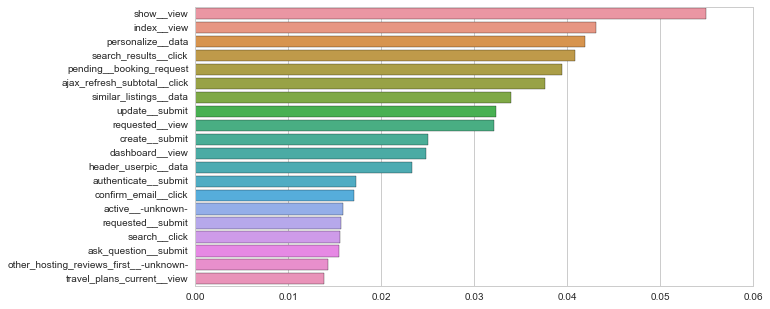

In [22]:
k = 20
plt.figure(figsize=(10,5))
sns.barplot(y=FeatureImportances.index[0:k],x=FeatureImportances.head(k))
#plt.xticks(rotation = 90)

NB: Features weren't scaled.

In [23]:
Nf = 2
list(FeatureImportances.index[0:Nf])
Xr = X[list(FeatureImportances.index[0:Nf])]

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [25]:
## Testing for optimal number of features
Acc = []
Rec = []
Prec = []

Nf = 2

for Nf in range(1,20):
    
    Xr = X[list(FeatureImportances.index[0:Nf])]

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xr, y, random_state=0)

    clf = RandomForestClassifier(n_estimators=100,min_samples_split=1)
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)

    Acc.append(metrics.accuracy_score(ytest,ypred))
    Rec.append(metrics.recall_score(ytest,ypred))
    Prec.append(metrics.precision_score(ytest,ypred))


In [150]:
## Testing for optimal number of features
Acc = []
Rec = []
Prec = []

Nf = 2

for Nf in range(10,100,10):
    
    Xr = X[list(FeatureImportances.index[0:Nf])]

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xr, y, random_state=0)

    clf = RandomForestClassifier(n_estimators=100,min_samples_split=1)
    clf.fit(Xtrain,ytrain)
    ypred = clf.predict(Xtest)

    Acc.append(metrics.accuracy_score(ytest,ypred))
    Rec.append(metrics.recall_score(ytest,ypred))
    Prec.append(metrics.precision_score(ytest,ypred))


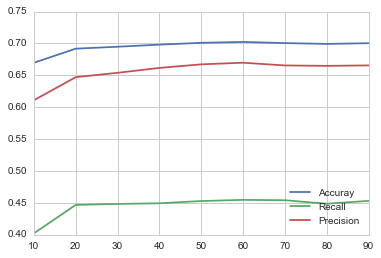

In [152]:
fig = plt.figure()
x = list( range(10,100,10))
plt.plot(x,Acc,label='Accuray')
plt.plot(x,Rec,label='Recall')
plt.plot(x,Prec,label='Precision')

plt.legend(loc='lower right')

In [153]:
train_test_split?

Ideal Number seems to be 20. More than that is likely overfitting.

Let's add some more features and see what that gets us.

In [218]:
A = session_df[['user_id','device_type','secs_elapsed']].groupby(['user_id','device_type']).sum().unstack()
deviceusage_df = A['secs_elapsed']
deviceusage_df.fillna(0,inplace=True)
deviceusage_df.head()

device_type,-unknown-,Android App Unknown Phone/Tablet,Android Phone,Blackberry,Chromebook,Linux Desktop,Mac Desktop,Opera Phone,Tablet,Windows Desktop,Windows Phone,iPad Tablet,iPhone,iPodtouch
user_id,,,,,,,,,,,,,,
00023iyk9l,0,0,0,0,0,0,295642,0,0,0,0,0,572254,0
0010k6l0om,0,0,0,0,0,0,586543,0,0,0,0,0,0,0
001wyh0pz8,0,282965,0,0,0,0,0,0,0,0,0,0,0,0
0028jgx1x1,297010,0,0,0,0,0,0,0,0,0,0,0,0,0
002qnbzfs5,203511,0,0,0,0,0,0,0,0,0,0,0,6283569,0


In [ ]:
## Add to existing

In [202]:
Nf = 20
COLS = list(FeatureImportances.index[0:Nf]) + ['id','country_destination']
SessionFeatures = Data[COLS]
SessionFeatures.head(3)

,show__view,index__view,personalize__data,search_results__click,ajax_refresh_subtotal__click,pending__booking_request,requested__view,similar_listings__data,update__submit,dashboard__view,...,authenticate__submit,verify__-unknown-,confirm_email__click,active__-unknown-,search__click,ask_question__submit,other_hosting_reviews_first__-unknown-,travel_plans_current__view,id,country_destination
137021,14,11,25,12,8,0,0,9,0,0,...,0,0,0,1,0,1,1,0,d1mm9tcy42,other
137022,2,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,yo8nz8bqcq,NDF
137023,0,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,4grx6yxeby,NDF


In [220]:
Data2 = pd.merge(SessionFeatures,deviceusage_df,right_index=True,left_on='id',how='inner')

In [221]:
X = Data2.drop(['id','country_destination'],axis=1)
y = Data2['country_destination']
y2 = y!='NDF'

In [214]:
from 


In [222]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y2, random_state=0)

clf = RandomForestClassifier(n_estimators=100,min_samples_split=1)
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

In [223]:
print('Accuracy = ',metrics.accuracy_score(ytest,ypred))
print('Recall = ',metrics.recall_score(ytest,ypred))
print('Precision = ',metrics.precision_score(ytest,ypred))

Accuracy =  0.691477768091
Recall =  0.458438996901
Precision =  0.641561514196


In [224]:
ypred = clf.predict(Xtrain)

In [225]:
ytest=ytrain

In [226]:
print('Accuracy = ',metrics.accuracy_score(ytest,ypred))
print('Recall = ',metrics.recall_score(ytest,ypred))
print('Precision = ',metrics.precision_score(ytest,ypred))

Accuracy =  0.994605296618
Recall =  0.987868928654
Precision =  0.998309065289


!!! Indication that we're overfitting here !!!

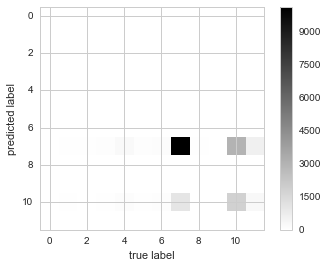

In [58]:
plt.imshow(metrics.confusion_matrix(ypred, ytest),
           interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")